In [102]:
# imporing all required liabrary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics

from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import optuna

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor

In [103]:
# readind the csv file 
df=pd.read_csv(r"SolarPrediction.csv")
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


### EDA

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [105]:
df.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [106]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [107]:
df.shape

(32686, 11)

In [108]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


### Feature Engineering

In [109]:
df['Month'] = pd.to_datetime(df.Data).dt.month.astype(int)

C:\Users\0819\AppData\Local\Temp\ipykernel_8332\990552959.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df.Data).dt.month.astype(int)


In [110]:
df['Day'] = pd.to_datetime(df.Data).dt.day.astype(int)

C:\Users\0819\AppData\Local\Temp\ipykernel_8332\3323974594.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Day'] = pd.to_datetime(df.Data).dt.day.astype(int)


In [111]:
df['Year'] = pd.to_datetime(df.Data).dt.year.astype(int)

C:\Users\0819\AppData\Local\Temp\ipykernel_8332\3654614293.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df.Data).dt.year.astype(int)


In [112]:
df = df.drop('Data', axis=1)

In [113]:
df['Hour'] = pd.to_datetime(df.Time).dt.hour.astype(int)
df['Minute'] = pd.to_datetime(df.Time).dt.minute.astype(int)
df['Second'] = pd.to_datetime(df.Time).dt.second.astype(int)

C:\Users\0819\AppData\Local\Temp\ipykernel_8332\3297350081.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df.Time).dt.hour.astype(int)


C:\Users\0819\AppData\Local\Temp\ipykernel_8332\3297350081.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df.Time).dt.minute.astype(int)
C:\Users\0819\AppData\Local\Temp\ipykernel_8332\3297350081.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Second'] = pd.to_datetime(df.Time).dt.second.astype(int)


In [114]:
df = df.drop('Time', axis=1)

In [115]:
df['SunriseHour'] = pd.to_datetime(df.TimeSunRise).dt.hour.astype(int)
df['SunriseMinute'] = pd.to_datetime(df.TimeSunRise).dt.minute.astype(int)

df['SunsetHour'] = pd.to_datetime(df.TimeSunSet).dt.hour.astype(int)
df['SunsetMinute'] = pd.to_datetime(df.TimeSunSet).dt.minute.astype(int)

C:\Users\0819\AppData\Local\Temp\ipykernel_8332\3709558090.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SunriseHour'] = pd.to_datetime(df.TimeSunRise).dt.hour.astype(int)
C:\Users\0819\AppData\Local\Temp\ipykernel_8332\3709558090.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SunriseMinute'] = pd.to_datetime(df.TimeSunRise).dt.minute.astype(int)
C:\Users\0819\AppData\Local\Temp\ipykernel_8332\3709558090.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SunsetHour'] = pd.to_datetime(df.TimeSunSet).dt.hour.astype(int)
C:\Users\0819\AppData\Local\Temp

In [116]:
df = df.drop(['TimeSunRise','TimeSunSet'], axis=1)

In [117]:
df.columns

Index(['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Month', 'Day', 'Year', 'Hour',
       'Minute', 'Second', 'SunriseHour', 'SunriseMinute', 'SunsetHour',
       'SunsetMinute'],
      dtype='object')

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

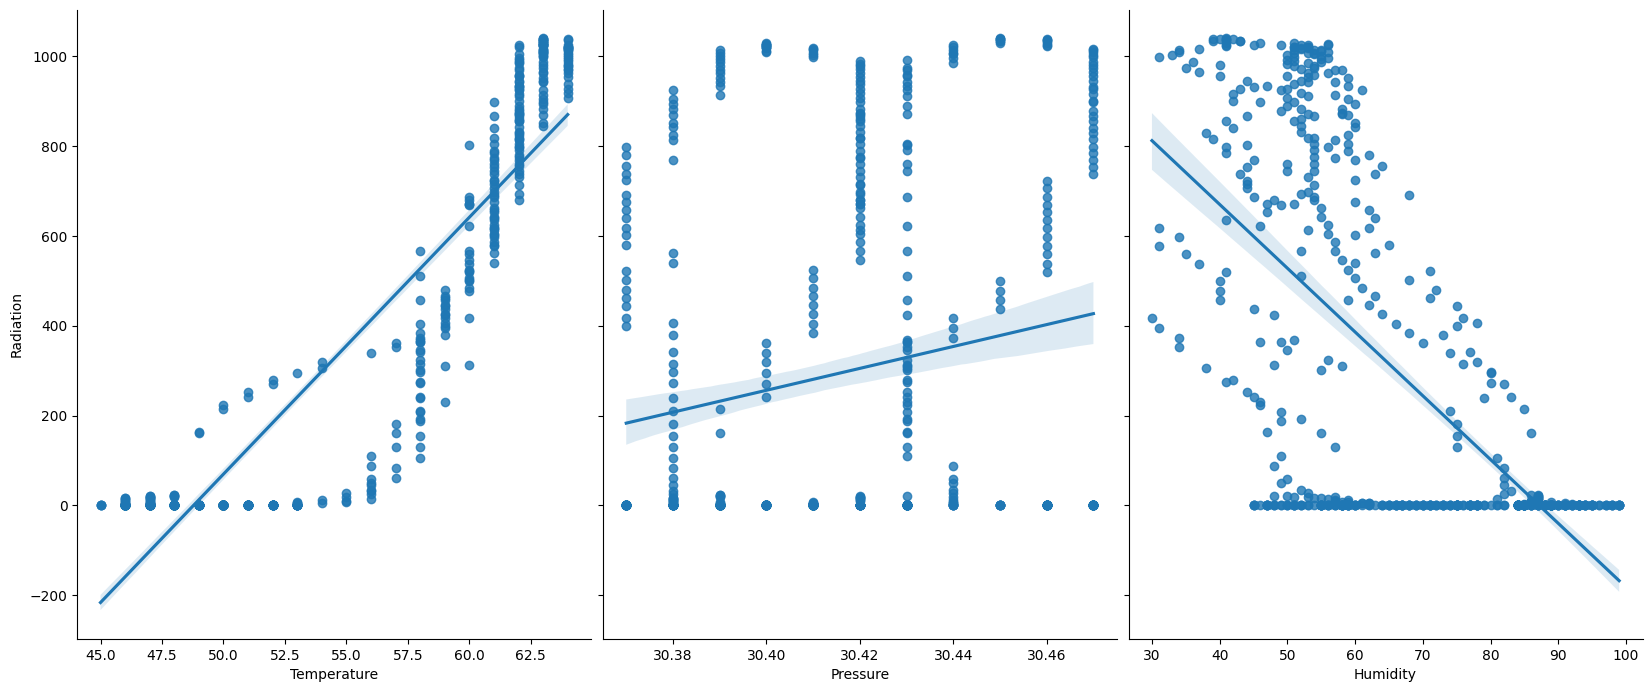

In [118]:
sns.pairplot(df.head(600),
            x_vars=["Temperature","Pressure","Humidity"],
            y_vars="Radiation",
            height=7,
            aspect=0.8,
            kind='reg')

In [119]:
df.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Year,Hour,Minute,Second,SunriseHour,SunriseMinute,SunsetHour,SunsetMinute
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860,0.968235,0.286457,NaN,0.001056,0.000406,0.231002,NaN,0.981908,-0.818884,0.586612
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,NaN,0.004398,-0.000730,-0.031270,NaN,-0.092850,0.048719,-0.039816
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,NaN,0.197464,-0.001934,-0.036147,NaN,-0.380968,0.300920,-0.242881
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,NaN,0.091069,0.001860,-0.031102,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,NaN,0.077899,0.000499,-0.027682,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,NaN,-0.077969,-0.000602,-0.032568,NaN,0.176929,-0.078540,0.070030
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,NaN,-0.057939,0.000192,-0.032934,NaN,0.167075,-0.159384,0.119926
Month,0.968235,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,NaN,-0.005396,0.000168,0.220563,NaN,0.952472,-0.784783,0.541883
Day,0.286457,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,NaN,-0.008010,-0.000196,0.089078,NaN,0.274522,-0.263575,0.265662
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df=df.drop('Year', axis=1)

In [121]:
df['SunriseHour'].unique()

array([6])

In [122]:
df = df.drop('SunriseHour', axis=1)


### Splitting the data into train and test

In [123]:
y = df['Radiation'].copy()
x = df.drop('Radiation',axis = 1).copy()

In [124]:
x

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunriseMinute,SunsetHour,SunsetMinute
0,1475229326,48,30.46,59,177.39,5.62,9,29,23,55,26,13,18,13
1,1475229023,48,30.46,58,176.78,3.37,9,29,23,50,23,13,18,13
2,1475228726,48,30.46,57,158.75,3.37,9,29,23,45,26,13,18,13
3,1475228421,48,30.46,60,137.71,3.37,9,29,23,40,21,13,18,13
4,1475228124,48,30.46,62,104.95,5.62,9,29,23,35,24,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,44,30.43,102,145.42,6.75,12,1,0,20,4,41,17,42
32682,1480587301,44,30.42,102,117.78,6.75,12,1,0,15,1,41,17,42
32683,1480587001,44,30.42,102,145.19,9.00,12,1,0,10,1,41,17,42
32684,1480586702,44,30.42,101,164.19,7.87,12,1,0,5,2,41,17,42


In [125]:
y

0        1.21
1        1.21
2        1.23
3        1.21
4        1.17
         ... 
32681    1.22
32682    1.17
32683    1.20
32684    1.23
32685    1.20
Name: Radiation, Length: 32686, dtype: float64

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22880, 14), (9806, 14), (22880,), (9806,))

In [127]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

LinearRegression()

In [128]:
y_pred=model_lr.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([-196.07099903, -114.71972055, -133.14333462, ...,  816.12206236,
        -19.1825485 , -176.189621  ])

In [129]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = 0.6291506957618184
mean_absolute_error = 145.93914305112506
mean_squared_error = 37035.203555559994


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

### Our data is having high variation so StandardScaler is used to resize the distribution of values 

### so that the mean of the observed values is 0 and the standard deviation is 1

In [130]:
scaler = StandardScaler()

scale_data = scaler.fit_transform(x)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in 

In [131]:
scale_data = pd.DataFrame(scale_data)
scale_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.937753,-0.500439,0.678974,-0.616253,0.407620,-0.178738,-1.391540,1.512248,1.655482,1.589236,0.660811,-0.943425,1.369126,-1.525765
1,-0.937854,-0.500439,0.678974,-0.654730,0.400285,-0.823359,-1.391540,1.512248,1.655482,1.299687,0.429167,-0.943425,1.369126,-1.525765
2,-0.937953,-0.500439,0.678974,-0.693206,0.183490,-0.823359,-1.391540,1.512248,1.655482,1.010138,0.660811,-0.943425,1.369126,-1.525765
3,-0.938054,-0.500439,0.678974,-0.577776,-0.069497,-0.823359,-1.391540,1.512248,1.655482,0.720589,0.274737,-0.943425,1.369126,-1.525765
4,-0.938153,-0.500439,0.678974,-0.500823,-0.463407,-0.178738,-1.391540,1.512248,1.655482,0.431040,0.506381,-0.943425,1.369126,-1.525765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,0.845373,-1.145490,0.130250,1.038241,0.023209,0.145006,1.344003,-1.701824,-1.672098,-0.437606,-1.037912,0.860876,-0.730393,0.293766
32682,0.845273,-1.145490,-0.052658,1.038241,-0.309138,0.145006,1.344003,-1.701824,-1.672098,-0.727155,-1.269556,0.860876,-0.730393,0.293766
32683,0.845173,-1.145490,-0.052658,1.038241,0.020443,0.789627,1.344003,-1.701824,-1.672098,-1.016704,-1.269556,0.860876,-0.730393,0.293766
32684,0.845073,-1.145490,-0.052658,0.999764,0.248901,0.465884,1.344003,-1.701824,-1.672098,-1.306253,-1.192341,0.860876,-0.730393,0.293766


<Axes: >

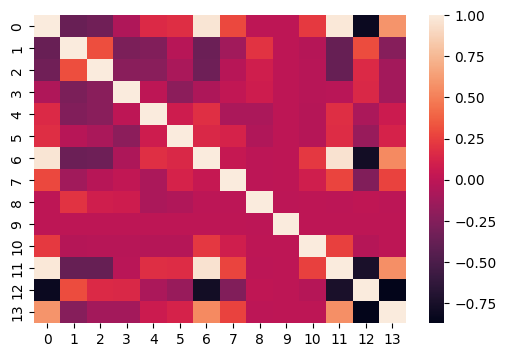

In [132]:
plt.figure(figsize=(6,4))
sns.heatmap(scale_data.corr()) 

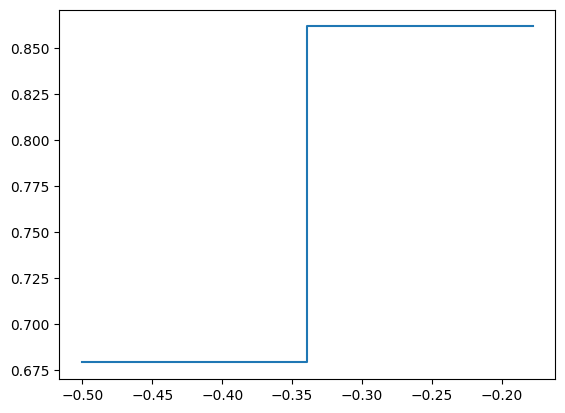

In [133]:
plt.plot(scale_data[1].head(20), scale_data[2].head(20))

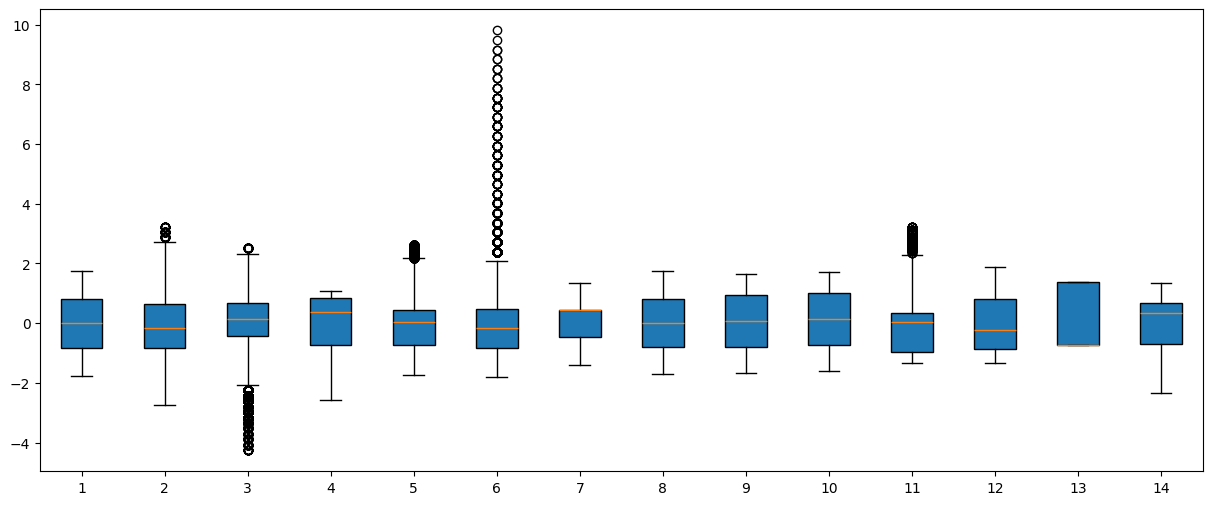

In [134]:
# Box plot is used for detecting the outliers.
fig = plt.figure(1, figsize=(15,6))

ax = fig.add_subplot(111)
bp = ax.boxplot(scale_data, patch_artist=True)

In [135]:
## Above Boxplot shows the outliers present in the data.
## For finding outliers we've used IQR(Inter Quartile Range) method.

In [136]:
l1 = scale_data.quantile(0.25)
l1

0    -0.832205
1    -0.822965
2    -0.418473
3    -0.731683
4    -0.736625
5    -0.823359
6    -0.479692
7    -0.783518
8    -0.804034
9    -0.727155
10   -0.960697
11   -0.878986
12   -0.730393
13   -0.710113
Name: 0.25, dtype: float64

In [137]:
h1 = scale_data.quantile(0.75)
h1

0     0.809608
1     0.628400
2     0.678974
3     0.845858
4     0.430706
5     0.465884
6     0.432155
7     0.823518
8     0.932095
9     1.010138
10    0.351952
11    0.796437
12    1.369126
13    0.670221
Name: 0.75, dtype: float64

In [138]:
IQR = h1-l1
IQR

0     1.641812
1     1.451364
2     1.097448
3     1.577541
4     1.167331
5     1.289243
6     0.911848
7     1.607036
8     1.736129
9     1.737293
10    1.312649
11    1.675422
12    2.099519
13    1.380334
dtype: float64

In [139]:
LB = l1 - 1.5*IQR
LB

0    -3.294923
1    -3.000011
2    -2.064645
3    -3.097994
4    -2.487621
5    -2.757224
6    -1.847463
7    -3.194072
8    -3.408228
9    -3.333095
10   -2.929670
11   -3.392119
12   -3.879671
13   -2.780614
dtype: float64

In [140]:
UB = h1 + 1.5*IQR
UB

0     3.272326
1     2.805446
2     2.325145
3     3.212169
4     2.181702
5     2.399749
6     1.799927
7     3.234072
8     3.536289
9     3.616078
10    2.320925
11    3.309570
12    4.518404
13    2.740722
dtype: float64

In [141]:
#scale_data[scale_data < LB]
#scale_data[scale_data > UB]

In [142]:
var = scale_data[(scale_data < LB) | (scale_data > UB)].index
var

RangeIndex(start=0, stop=32686, step=1)

In [143]:
without_outlier = scale_data.drop(index=var)
without_outlier

,0,1,2,3,4,5,6,7,8,9,10,11,12,13


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22880, 14), (9806, 14), (22880,), (9806,))

In [145]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

LinearRegression()

In [146]:
y_pred=model_lr.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([-196.07099903, -114.71972055, -133.14333462, ...,  816.12206236,
        -19.1825485 , -176.189621  ])

In [147]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = 0.6291506957618184
mean_absolute_error = 145.93914305112506
mean_squared_error = 37035.203555559994


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [148]:
ridge=Ridge()
ridge.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

Ridge()

In [149]:
alpha = [0.1, 0.5, 1, 5, 10, 50 ,100]

In [150]:
para_lin = {"alpha":alpha}
para_lin

{'alpha': [0.1, 0.5, 1, 5, 10, 50, 100]}

In [151]:
gdscv=GridSearchCV(estimator=ridge,param_grid=para_lin,cv=5,verbose=2,
                   n_jobs=-1)
gdscv.fit(x_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10, 50, 100]}, verbose=2)

In [152]:
gdscv.best_params_

{'alpha': 1}

In [153]:
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

Ridge(alpha=1)

In [154]:
y_pred=ridge.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([-196.37488532, -114.15377512, -132.99535895, ...,  816.75065953,
        -19.81390298, -176.31755494])

In [155]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = 0.6291488965434113
mean_absolute_error = 145.95666790871593
mean_squared_error = 37035.38323614503


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

### Random Forest

In [156]:
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

RandomForestRegressor()

In [157]:
y_pred=model_rf.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([  1.2299,   1.1958,   1.1993, ..., 791.7788,   1.2057,   1.2205])

In [158]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = 0.9915384922555104
mean_absolute_error = 10.88073572115385
mean_squared_error = 845.0161780615146


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [159]:
y_pred_test=model_rf.predict(x_test)
y_pred_test

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([  1.2566,   1.1932, 201.5332, ...,   1.2327,   1.2336,   1.225 ])

In [160]:
acc=r2_score(y_test,y_pred_test)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_test,y_pred_test)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_test,y_pred_test)
print(f"mean_squared_error = {mse}")

Accuracy = 0.9413313433200338
mean_absolute_error = 27.829956893738526
mean_squared_error = 5843.773688300262


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

### Decision Tree

In [161]:
model_dt=DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

DecisionTreeRegressor()

In [162]:
y_pred=model_dt.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([  1.23,   1.19,   1.2 , ..., 799.32,   1.21,   1.22])

In [163]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = 1.0
mean_absolute_error = 2.7173290812503834e-19
mean_squared_error = 6.033682622975397e-35


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [164]:
y_pred_test=model_dt.predict(x_test)
acc=r2_score(y_test,y_pred_test)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_test,y_pred_test)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_test,y_pred_test)
print(f"mean_squared_error = {mse}")

Accuracy = 0.8946604598494968
mean_absolute_error = 34.94511931470528
mean_squared_error = 10492.492378462164


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

### Hyper Parameter Tunning for DT

In [165]:
max_depth =  np.arange(10,30,5)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = [None, 'sqrt', 'log2']

In [166]:
para_dt={"max_depth":max_depth,
         "min_samples_split":min_samples_split,
         "min_samples_leaf":min_samples_leaf,
         "max_features":max_features}
para_dt

{'max_depth': array([10, 15, 20, 25]),
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': [None, 'sqrt', 'log2']}

In [167]:
gdscv=GridSearchCV(estimator=model_dt,param_grid=para_dt,cv=5,verbose=2,n_jobs=-1)
gdscv.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([10, 15, 20, 25]),
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [168]:
gdscv.best_params_

{'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [169]:
hyp_model_dt=DecisionTreeRegressor(max_depth = 15,
 max_features = None,
 min_samples_leaf = 4,
 min_samples_split = 10)

In [170]:
hyp_model_dt.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

DecisionTreeRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=10)

In [171]:
y_pred=hyp_model_dt.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([  1.22615385,   1.20606936,   1.19761905, ..., 801.66      ,
         1.21875   ,   1.21      ])

In [172]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = 0.9622486481023872
mean_absolute_error = 23.53564286147106
mean_squared_error = 3770.073143046004


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [173]:
y_pred_test=hyp_model_dt.predict(x_test)
y_pred_test

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([  1.262     ,   1.162     , 138.5875    , ...,   1.23071429,
         1.21933333,   1.22615385])

In [174]:
acc=r2_score(y_test,y_pred_test)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_test,y_pred_test)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_test,y_pred_test)
print(f"mean_squared_error = {mse}")

Accuracy = 0.9144427899350991
mean_absolute_error = 34.79616627733189
mean_squared_error = 8522.045693818915


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

### Adaboost 

In [175]:
model_adb=AdaBoostRegressor()
model_adb.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

AdaBoostRegressor()

In [176]:
y_pred=model_adb.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([ 51.15569907,  90.3462244 ,  90.3462244 , ..., 779.3165456 ,
        51.15569907,  90.3462244 ])

In [177]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = 0.7965086504164887
mean_absolute_error = 108.05177619269202
mean_squared_error = 20321.848976102352


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [178]:
y_pred_test=model_adb.predict(x_test)
y_pred_test

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([ 49.33556658,  51.15569907, 355.11561229, ...,  51.15569907,
        90.3462244 ,  51.15569907])

In [179]:
acc=r2_score(y_test,y_pred_test)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_test,y_pred_test)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_test,y_pred_test)
print(f"mean_squared_error = {mse}")

Accuracy = 0.794170871792043
mean_absolute_error = 107.86495102901203
mean_squared_error = 20501.898488467872


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

### Hyper parameter Tunning For AdaBoost.

In [180]:
n_estimators = np.arange(50,200,50)
learning_rate = [0.1, 0.5, 1.0]
# loss = ['linear', 'square', 'exponential']
# random_state = np.arange(1,100,10)

In [181]:
para_adb={"n_estimators":n_estimators,
          "learning_rate":learning_rate,
        #   "loss":loss,
        #   "random_state":random_state
        }
para_adb

{'n_estimators': array([ 50, 100, 150]), 'learning_rate': [0.1, 0.5, 1.0]}

In [182]:
gdscv=GridSearchCV(estimator=model_adb,param_grid=para_adb,verbose=2,cv=5,n_jobs=-1)
gdscv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': array([ 50, 100, 150])},
             verbose=2)

In [183]:
gdscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [184]:
hyp_model_adb=AdaBoostRegressor(learning_rate = 0.1,
 loss = 'exponential',
 n_estimators = 100,
 random_state = 1)
hyp_model_adb.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100,
                  random_state=1)

In [185]:
y_pred=hyp_model_adb.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([  2.81693802,  59.41860683,  67.16140351, ..., 747.97758713,
         2.81693802,  59.41860683])

In [186]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = 0.8165923912038677
mean_absolute_error = 85.19432088075253
mean_squared_error = 18316.167909110332


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

### KMeanse Clusterning

In [187]:
model_kmeans=KMeans()
model_kmeans.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 1

KMeans()

In [188]:
y_pred=model_kmeans.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([6, 7, 0, ..., 5, 1, 7])

In [189]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = -0.4255453591893401
mean_absolute_error = 208.31706293706296
mean_squared_error = 142363.38575237762


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [190]:
### k-means Clusterning model is worst model so we go for next model.

### KNN

In [191]:
model_knn=KNeighborsRegressor()
model_knn.fit(x_train,y_train)

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

KNeighborsRegressor()

In [192]:
y_pred=model_knn.predict(x_train)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([  1.242,   1.22 ,   1.2  , ..., 805.99 ,   1.182,   1.218])

In [193]:
acc=r2_score(y_train,y_pred)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_train,y_pred)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_train,y_pred)
print(f"mean_squared_error = {mse}")

Accuracy = 0.9626594058888296
mean_absolute_error = 21.055752884615387
mean_squared_error = 3729.0524425645103


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [194]:
y_pred_test=model_knn.predict(x_test)
y_pred

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([  1.242,   1.22 ,   1.2  , ..., 805.99 ,   1.182,   1.218])

In [195]:
acc=r2_score(y_test,y_pred_test)
print(f"Accuracy = {acc}")

mae=mean_absolute_error(y_test,y_pred_test)
print(f"mean_absolute_error = {mae}")

mse=mean_squared_error(y_test,y_pred_test)
print(f"mean_squared_error = {mse}")

Accuracy = 0.9460569927175618
mean_absolute_error = 25.303633897613707
mean_squared_error = 5373.068763862533


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

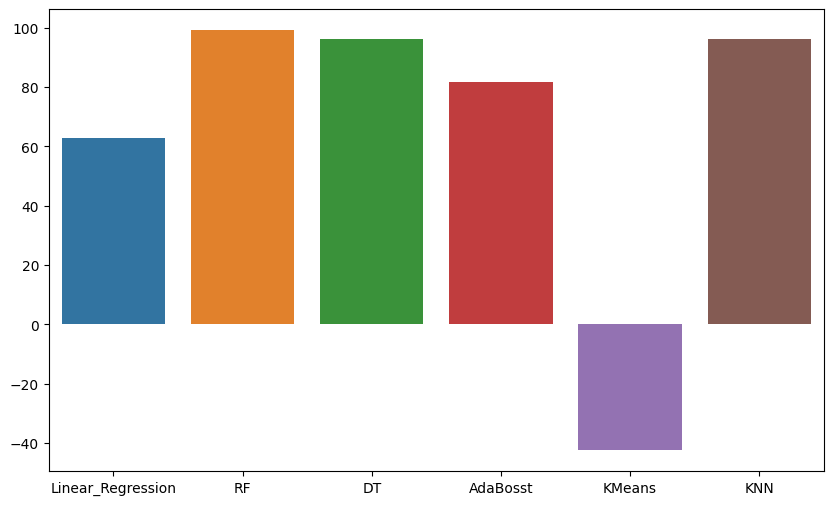

In [196]:
accuracy=[62.91506957618184, 99.13480341275459, 96.22486481023872, 81.65923912038677,-42.447700649568487,96.26594058888296]
models=["Linear_Regression", "RF", "DT","AdaBosst","KMeans","KNN"]
plt.figure(figsize=(10,6))
sns.barplot(x=models,y=accuracy)
plt.show()